In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
navigation_events = pd.read_csv('./data/hackathon_alternate_data/navigation_events.csv')

students = pd.read_csv('./data/hackathon_alternate_data/additional/gradebook.csv')
students.head()

students_sorted_a1_dsc = students.sort_values(by='Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)', ascending=False)
top_students = students_sorted_a1_dsc.head(int(0.25 * len(students_sorted_a1_dsc) + 1))

top_students


,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
0,NaN,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,NaN,NaN,NaN,NaN,NaN
22,LEARNER_24,95,90,NaN,NaN,78,NaN,8.5,95,90,78,85,86.4
17,LEARNER_14,95,92,NaN,86,NaN,NaN,6,95,92,86,60,84.4
14,LEARNER_37,94,82,83,NaN,NaN,NaN,7,94,82,83,70,82.3
28,LEARNER_3,94,92,NaN,NaN,82,NaN,9,94,92,82,90,89
25,LEARNER_6,94,94,NaN,84,NaN,NaN,10,94,94,84,100,92.2
26,LEARNER_2,93,85,NaN,NaN,NaN,95,6,93,85,95,60,84.6
32,LEARNER_25,93,88,81,NaN,NaN,NaN,9,93,88,81,90,87.3
6,LEARNER_7,92,83,NaN,NaN,80,NaN,10,92,83,80,100,87.3
20,LEARNER_35,92,72,NaN,77,NaN,NaN,8,92,72,77,80,79.1


In [3]:
students_sorted_a1_asc = students.sort_values(by='Assignment 1 (c81f04547a95da2a7b88054ef491b7c4)', ascending=True)
bot_students = students_sorted_a1_asc.head(int(0.25 * len(students_sorted_a1_asc) + 1))

bot_students

,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
1,Points Possible,100,100,100,100,100,100,10,(read only),(read only),(read only),(read only),(read only)
10,LEARNER_36,56,84,75,NaN,NaN,NaN,6,56,84,75,60,70.9
29,LEARNER_48,69,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,NaN,13.8
18,LEARNER_21,71,87,84,NaN,NaN,NaN,6.5,71,87,84,65,78.5
35,LEARNER_18,73,73,NaN,NaN,74,NaN,5.5,73,73,74,55,69.7
7,LEARNER_30,77,89,NaN,NaN,74,NaN,7,77,89,74,70,78.3
24,LEARNER_31,78,84,77,NaN,NaN,NaN,7,78,84,77,70,77.9
23,LEARNER_1,79,84,NaN,NaN,73,NaN,9,79,84,73,90,80.9
30,LEARNER_33,79,87,NaN,NaN,74,NaN,4,79,87,74,40,72.1
15,LEARNER_17,80,65,74,NaN,NaN,NaN,4,80,65,74,40,65.7


In [4]:
learner_ids = top_students['Student'].tolist()
learner_ids
cleaned_learner_ids = learner_ids[1:]

top_student_navigation_events = navigation_events[navigation_events['actor_id'].isin(cleaned_learner_ids)]

/var/folders/x7/cfcf3mls3rs_gh56qk8c6vdc0000gn/T/ipykernel_44951/3495061606.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_student_navigation_events['event_time'] = pd.to_datetime(top_student_navigation_events['event_time'], format='ISO8601')


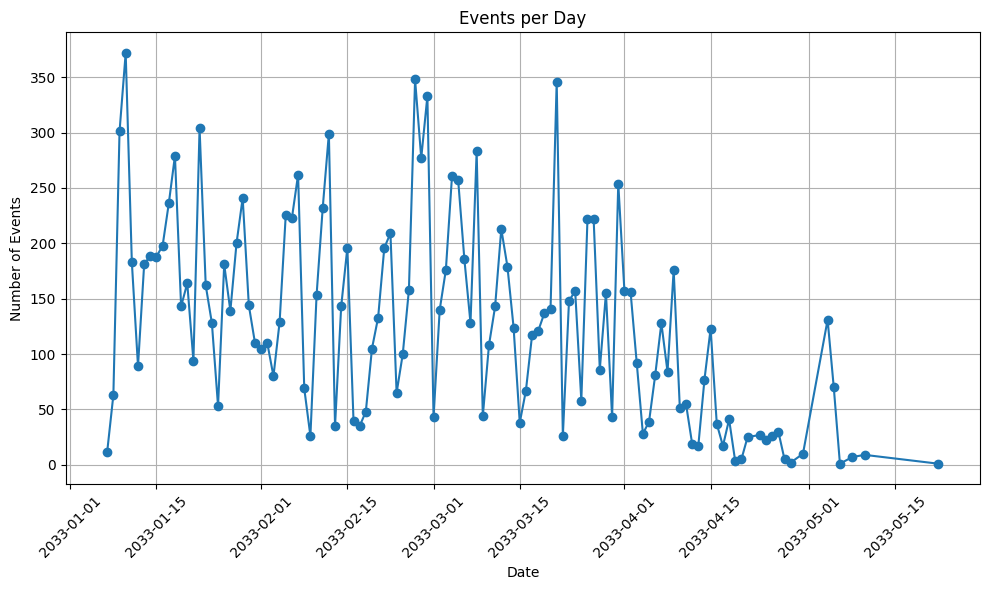

In [5]:
# Get basic information about the DataFrame
# df_info = df.info()

# Summary statistics of the data
# summary_statistics = df.describe()

# Visualize the data
top_student_navigation_events['event_time'] = pd.to_datetime(top_student_navigation_events['event_time'], format='ISO8601')

# Group the events by day and count the number of events per day
daily_events = top_student_navigation_events['event_time'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_events.index, daily_events.values, marker='o', linestyle='-')
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.tight_layout()
plt.show()

In [6]:
learner_ids = bot_students['Student'].tolist()
learner_ids
cleaned_learner_ids = learner_ids[1:]

bot_student_navigation_events = navigation_events[navigation_events['actor_id'].isin(cleaned_learner_ids)]

/var/folders/x7/cfcf3mls3rs_gh56qk8c6vdc0000gn/T/ipykernel_44951/748002280.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_student_navigation_events['event_time'] = pd.to_datetime(bot_student_navigation_events['event_time'], format='ISO8601')


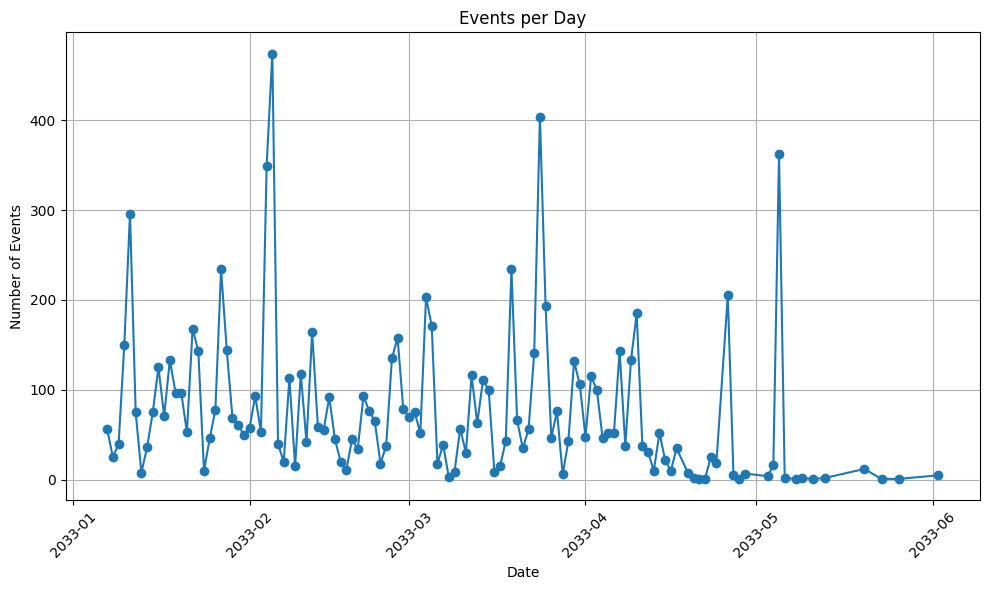

In [7]:
# Get basic information about the DataFrame
# df_info = df.info()

# Summary statistics of the data
# summary_statistics = df.describe()

# Visualize the data
bot_student_navigation_events['event_time'] = pd.to_datetime(bot_student_navigation_events['event_time'], format='ISO8601')

# Group the events by day and count the number of events per day
daily_events = bot_student_navigation_events['event_time'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_events.index, daily_events.values, marker='o', linestyle='-')
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.tight_layout()
plt.show()

In [8]:
import pandas as pd

df = pd.read_csv("data/hackathon_alternate_data/additional/assignments.csv")
df


,id,due_at,unlock_at,lock_at,points_possible,grading_type,position,name,submission_types,has_submitted_submissions,workflow_state,published
0,c81f04547a95da2a7b88054ef491b7c4,2033-02-05 20:06:09+00:00,NaN,NaN,100,points,1,Assignment 1,['online_upload'],True,published,True
1,e5913deca98a20cf4dc4658b53168732,2033-02-05 20:06:09+00:00,NaN,NaN,100,points,2,Assignment 1 Copy,['online_upload'],False,unpublished,False
2,a4dc11e7e79361fc5886a9078aac66b8,2033-03-05 20:06:09+00:00,NaN,NaN,100,points,1,Assignment 2,['online_upload'],True,published,True
3,811d93ea379b5cdd5a19f1b5dbab88cd,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,2,Assignment 3 (option A),['online_upload'],True,published,True
4,df8d1f1ff3f48fdc24a278b40c5f45cc,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,3,Assignment 3 (option B),['online_upload'],True,published,True
5,bb971b36c1578cede00150acda89aa99,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,4,Assignment 3 (option C),['online_upload'],True,published,True
6,f1ad954cd2cddda6e17f6fc225d1aa3e,2033-04-09 19:06:09+00:00,NaN,NaN,100,points,5,Assignment 3 (option D),['online_upload'],True,published,True
7,5965e0b0c712861d0efdd9be54572114,NaN,NaN,NaN,10,points,1,Participation grade: Formative (not included i...,['none'],False,unpublished,False
8,067f62cae2a61d43712cc7c84f1eb08a,NaN,NaN,NaN,10,points,2,Participation grade: Summative,['none'],False,published,True


In [9]:


students_sorted_a2_dsc = students.sort_values(by='Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)', ascending=False)
top_students_assignment_2 = students_sorted_a1_dsc.head(int(0.25 * len(students_sorted_a1_dsc) + 1))

top_students_assignment_2


,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
0,NaN,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,Manual Posting,NaN,NaN,NaN,NaN,NaN
22,LEARNER_24,95,90,NaN,NaN,78,NaN,8.5,95,90,78,85,86.4
17,LEARNER_14,95,92,NaN,86,NaN,NaN,6,95,92,86,60,84.4
14,LEARNER_37,94,82,83,NaN,NaN,NaN,7,94,82,83,70,82.3
28,LEARNER_3,94,92,NaN,NaN,82,NaN,9,94,92,82,90,89
25,LEARNER_6,94,94,NaN,84,NaN,NaN,10,94,94,84,100,92.2
26,LEARNER_2,93,85,NaN,NaN,NaN,95,6,93,85,95,60,84.6
32,LEARNER_25,93,88,81,NaN,NaN,NaN,9,93,88,81,90,87.3
6,LEARNER_7,92,83,NaN,NaN,80,NaN,10,92,83,80,100,87.3
20,LEARNER_35,92,72,NaN,77,NaN,NaN,8,92,72,77,80,79.1


In [10]:
students_sorted_a2_asc = students.sort_values(by='Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8)', ascending=True)
bot_students_a2 = students_sorted_a1_asc.head(int(0.25 * len(students_sorted_a1_asc) + 1))

bot_students_a2

,Student,Assignment 1 (c81f04547a95da2a7b88054ef491b7c4),Assignment 2 (a4dc11e7e79361fc5886a9078aac66b8),Assignment 3 (option A) (811d93ea379b5cdd5a19f1b5dbab88cd),Assignment 3 (option B) (df8d1f1ff3f48fdc24a278b40c5f45cc),Assignment 3 (option C) (bb971b36c1578cede00150acda89aa99),Assignment 3 (option D) (f1ad954cd2cddda6e17f6fc225d1aa3e),Participation grade: Formative (not included in final grade) (5965e0b0c712861d0efdd9be54572114),Assignment 1 Current Score,Assignment 2 Current Score,Assignment 3 Current Score,Participation & engagement Current Score,Current Score
1,Points Possible,100,100,100,100,100,100,10,(read only),(read only),(read only),(read only),(read only)
10,LEARNER_36,56,84,75,NaN,NaN,NaN,6,56,84,75,60,70.9
29,LEARNER_48,69,NaN,NaN,NaN,NaN,NaN,NaN,69,NaN,NaN,NaN,13.8
18,LEARNER_21,71,87,84,NaN,NaN,NaN,6.5,71,87,84,65,78.5
35,LEARNER_18,73,73,NaN,NaN,74,NaN,5.5,73,73,74,55,69.7
7,LEARNER_30,77,89,NaN,NaN,74,NaN,7,77,89,74,70,78.3
24,LEARNER_31,78,84,77,NaN,NaN,NaN,7,78,84,77,70,77.9
23,LEARNER_1,79,84,NaN,NaN,73,NaN,9,79,84,73,90,80.9
30,LEARNER_33,79,87,NaN,NaN,74,NaN,4,79,87,74,40,72.1
15,LEARNER_17,80,65,74,NaN,NaN,NaN,4,80,65,74,40,65.7


In [11]:
learner_ids_2 = top_students_assignment_2['Student'].tolist()
learner_ids_2
cleaned_learner_ids_2 = learner_ids_2[1:]

top_student_navigation_events_2 = navigation_events[navigation_events['actor_id'].isin(cleaned_learner_ids_2)]

/var/folders/x7/cfcf3mls3rs_gh56qk8c6vdc0000gn/T/ipykernel_44951/1590762705.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_student_navigation_events_2['event_time'] = pd.to_datetime(top_student_navigation_events_2['event_time'], format='ISO8601')


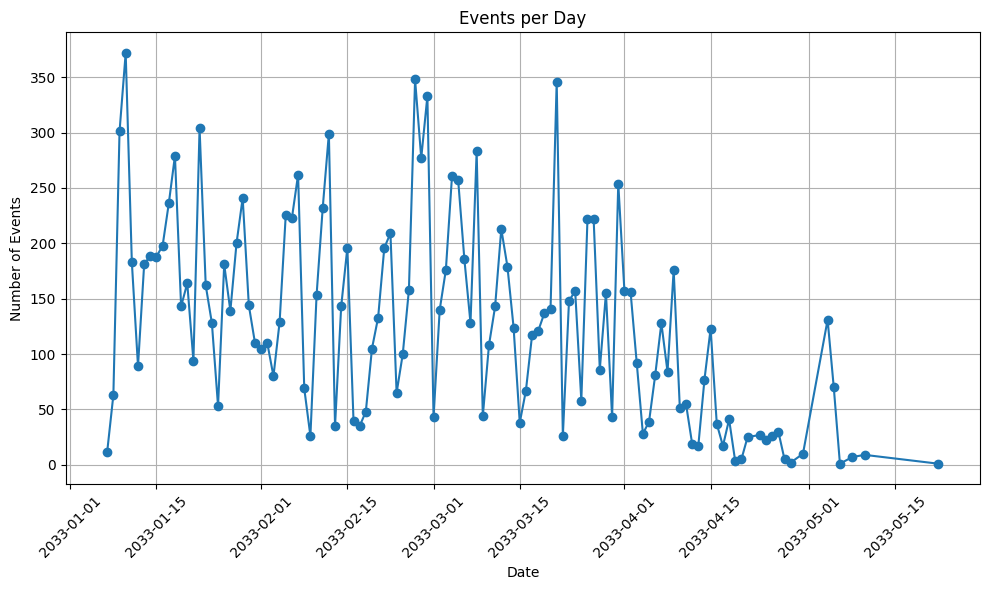

In [12]:
# Get basic information about the DataFrame
# df_info = df.info()

# Summary statistics of the data
# summary_statistics = df.describe()

# Visualize the data
top_student_navigation_events_2['event_time'] = pd.to_datetime(top_student_navigation_events_2['event_time'], format='ISO8601')

# Group the events by day and count the number of events per day
daily_events_2 = top_student_navigation_events_2['event_time'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_events_2.index, daily_events_2.values, marker='o', linestyle='-')
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.tight_layout()
plt.show()

In [15]:
learner_ids_2 = bot_students_a2['Student'].tolist()
learner_ids_2
cleaned_learner_ids_2 = learner_ids_2[1:]

bot_student_navigation_events_2 = navigation_events[navigation_events['actor_id'].isin(cleaned_learner_ids_2)]

/var/folders/x7/cfcf3mls3rs_gh56qk8c6vdc0000gn/T/ipykernel_44951/947866082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bot_student_navigation_events_2['event_time'] = pd.to_datetime(bot_student_navigation_events_2['event_time'], format='ISO8601')


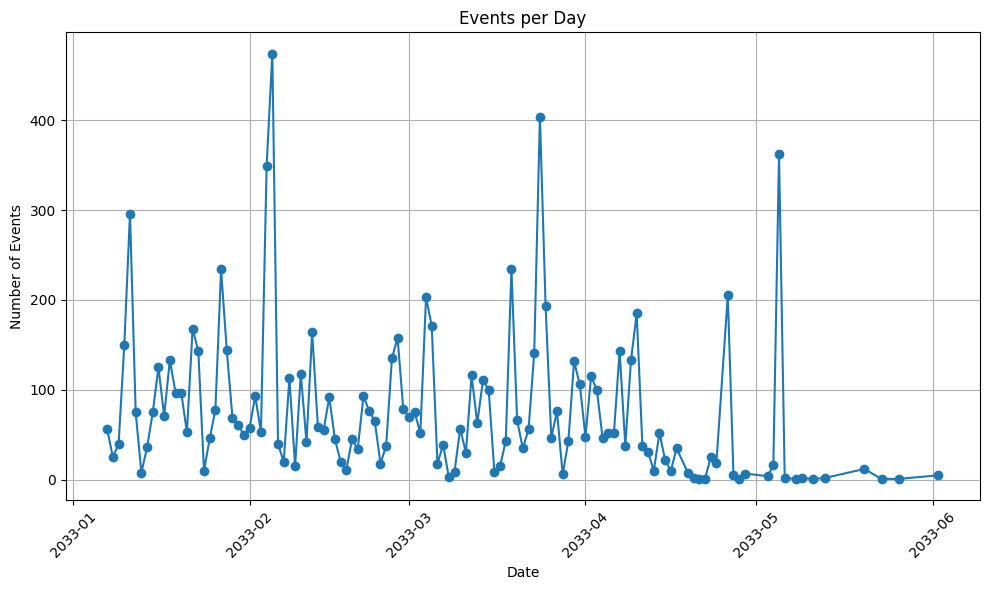

In [16]:
# Get basic information about the DataFrame
# df_info = df.info()

# Summary statistics of the data
# summary_statistics = df.describe()

# Visualize the data
bot_student_navigation_events_2['event_time'] = pd.to_datetime(bot_student_navigation_events_2['event_time'], format='ISO8601')

# Group the events by day and count the number of events per day
daily_events_2 = bot_student_navigation_events_2['event_time'].dt.date.value_counts().sort_index()

# Create a line graph
plt.figure(figsize=(10, 6))
plt.plot(daily_events.index, daily_events.values, marker='o', linestyle='-')
plt.title('Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.grid(True)

# Display the graph
plt.tight_layout()
plt.show()